# Note

* All results are saved in folder res-data

* Parameter `response`: 1 as continuous phenotypes, 2 as binary phenotypes

# Infinitesimal model

## Delete previous outputs

In [3]:
rm -r res-data

: 1

## Run SoS

In [4]:
sos run ldpred.ipynb inf \
    --datafolder post-qc \
    --summstats_file post-qc/Height.QC.gz \
    --hapmap3 post-qc/hm3_variants.rds \
    --bed_file  post-qc/EUR.QC.bed \
    --geno_file post-qc/EUR.QC.rds \
    --pheno_file post-qc/EUR.height \
    --covariate_file post-qc/EUR.cov \
    --pcs_file post-qc/EUR.eigenvec \
    --pheno_out './res-data/PhenoOut.RData' \
    --summary_stat './res-data/SumStats.RData' \
    --qc_in './res-data/QcInput.RData' \
    --qc_plot './res-data/QcPlot.png' \
    --ld_in './res-data/LdInput.RData' \
    --sd_out './res-data/sd.rds' \
    --ld_out './res-data/LdOutput.RData' \
    --ldreg_out './res-data/LdRegOut.RData' \
    --inf_beta './res-data/InfBeta.RData' \
    --grid_beta './res-data/GridBeta.RData' \
    --auto_beta './res-data/AutoBeta.RData' \
    --inf_prs './res-data/InfPrs.RData' \
    --grid_prs './res-data/GridPrs.RData' \
    --auto_prs './res-data/AutoPrs.RData' \
    --null_r2 './res-data/NullR2.RData' \
    --inf_mod './res-data/InfMod.RData' \
    --grid_mod './res-data/GridMod.RData' \
    --auto_mod './res-data/AutoMod.RData' \
    --inf_pheno_pred './res-data/InfPhenoPred.RData' \
    --grid_pheno_pred './res-data/GridPhenoPred.RData' \
    --auto_pheno_pred './res-data/AutoPhenoPred.RData' \
    --inf_ldpred_res './res-data/InfLdpredRes.RData' \
    --grid_ldpred_res './res-data/GridLdpredRes.RData' \
    --auto_ldpred_res './res-data/AutoLdpredRes.RData' \
    --response 1
    

INFO: Running inf_10: l
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
INFO: inf_10 is completed.
INFO: Running inf_20: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
INFO: inf_20 is completed.
INFO: inf_20 output:   res-data/SumStats.RData
INFO: Running inf_25: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
INFO: inf_25 is completed.
INFO: inf_25 output:   res-data/PhenoOut.RData
INFO: Running inf_30: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES f

: 1

## List all outputs in res-data folder

In [5]:
ls res-data

InfBeta.RData       LdOutput.RData      QcInput.RData       sd.rds
InfMod.RData        LdRegOut.RData      QcPlot.png
InfPrs.RData        NullR2.RData        SumStats.RData
LdInput.RData       PhenoOut.RData      filea901a76d74f.sbk


: 1

## The model of phenotype against covariates and PRS, and their R-squared

In [6]:
load("./res-data/InfMod.RData")
summary(inf_model)
result


Call:
lm(formula = reg.formula, data = reg.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16590 -0.57829 -0.03314  0.54153  2.66938 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.686e+02  1.685e-01 1000.752   <2e-16 ***
PRS          5.824e-04  3.105e-04    1.876   0.0614 .  
Sex          8.661e-01  7.748e-02   11.178   <2e-16 ***
PC1         -8.339e-01  8.466e-01   -0.985   0.3252    
PC2         -2.510e+00  8.553e-01   -2.935   0.0035 ** 
PC3         -3.577e-01  8.432e-01   -0.424   0.6716    
PC4         -4.452e-02  1.570e+00   -0.028   0.9774    
PC5         -4.395e-02  9.288e-01   -0.047   0.9623    
PC6         -9.853e-03  8.858e-01   -0.011   0.9911    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8355 on 463 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.2312,	Adjusted R-squared:  0.2179 
F-statistic:  17.4 on 8 and 463 DF,  p-va

infinitesimal,null
<dbl>,<dbl>
0.2311903,0.2253494


# MVP

* reference panel: `download_1000G()` in `bigsnpr`

Including 2490 (mostly unrelated) individuals and ~1.7M SNPs in common with either HapMap3 or the UK Biobank.

* summary stats: raw and posterior betas for traits ldl,hdl,tc and tg

* LDpred2-auto model free of hyper-parameters: run the algorithms for 30 different p (the proportion of causal variants) values range from 10e-4 to 0.9, and heritability from ld score regression as initial value. (To get the best chain, we need the genotypes (do not have right now) from subjects and predicted polygenic risk score.)



In [6]:
rm -r res-data

: 1

## ldl

In [14]:
sos run ldpred-mvp.ipynb auto \
    --summstats_file mvpdata/sumstats_ldl.rds \
    --bed_file  1000G/1000G.bed \
    --geno_file 1000G/1000G.rds \
    --summary_stat './res-data/SumStats.RData' \
    --qc_in './res-data/QcInput.RData' \
    --qc_plot './res-data/QcPlot.png' \
    --conv-plot './res-data/ConvPlot.png' \
    --ld_in './res-data/LdInput.RData' \
    --sd_out './res-data/sd.rds' \
    --ld_out './res-data/LdOutput.RData' \
    --ldreg_out './res-data/LdRegOut.RData' \
    --inf_beta './res-data/InfBeta.RData' \
    --grid_beta './res-data/GridBeta.RData' \
    --auto_beta './res-data/AutoBeta.RData' \
    --inf_prs './res-data/InfPrs.RData' \
    --grid_prs './res-data/GridPrs.RData' \
    --auto_prs './res-data/AutoPrs.RData' \
    --null_r2 './res-data/NullR2.RData' \
    --inf_mod './res-data/InfMod.RData' \
    --grid_mod './res-data/GridMod.RData' \
    --auto_mod './res-data/AutoMod.RData' \
    --inf_pheno_pred './res-data/InfPhenoPred.RData' \
    --grid_pheno_pred './res-data/GridPhenoPred.RData' \
    --auto_pheno_pred './res-data/AutoPhenoPred.RData' \
    --inf_ldpred_res './res-data/InfLdpredRes.RData' \
    --grid_ldpred_res './res-data/GridLdpredRes.RData' \
    --auto_ldpred_res './res-data/AutoLdpredRes.RData' \
    --response 1

INFO: Running auto_10: 
INFO: Running auto_20: 
INFO: auto_20 (index=0) is ignored due to saved signature
INFO: auto_20 output:   res-data/SumStats.RData
INFO: Running auto_31: 
INFO: auto_31 (index=0) is ignored due to saved signature
INFO: auto_31 output:   res-data/QcInput.RData
INFO: Running auto_35: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
Loading required package: bigstatsr
INFO: Running grid_33: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
Loading required package: bigstatsr
Error : File '1000G/1000G.bk' already exists.
INFO: auto_10 is completed.
Saving 7 x 7 in image
[1] "1307124 over 1339339 was removed in Quality Control."
INFO: grid_33 is completed.
INFO: grid_33 outp

: 1

See the removed SNP during quality control

> res-data/QcPlot.png (480.7 KiB):

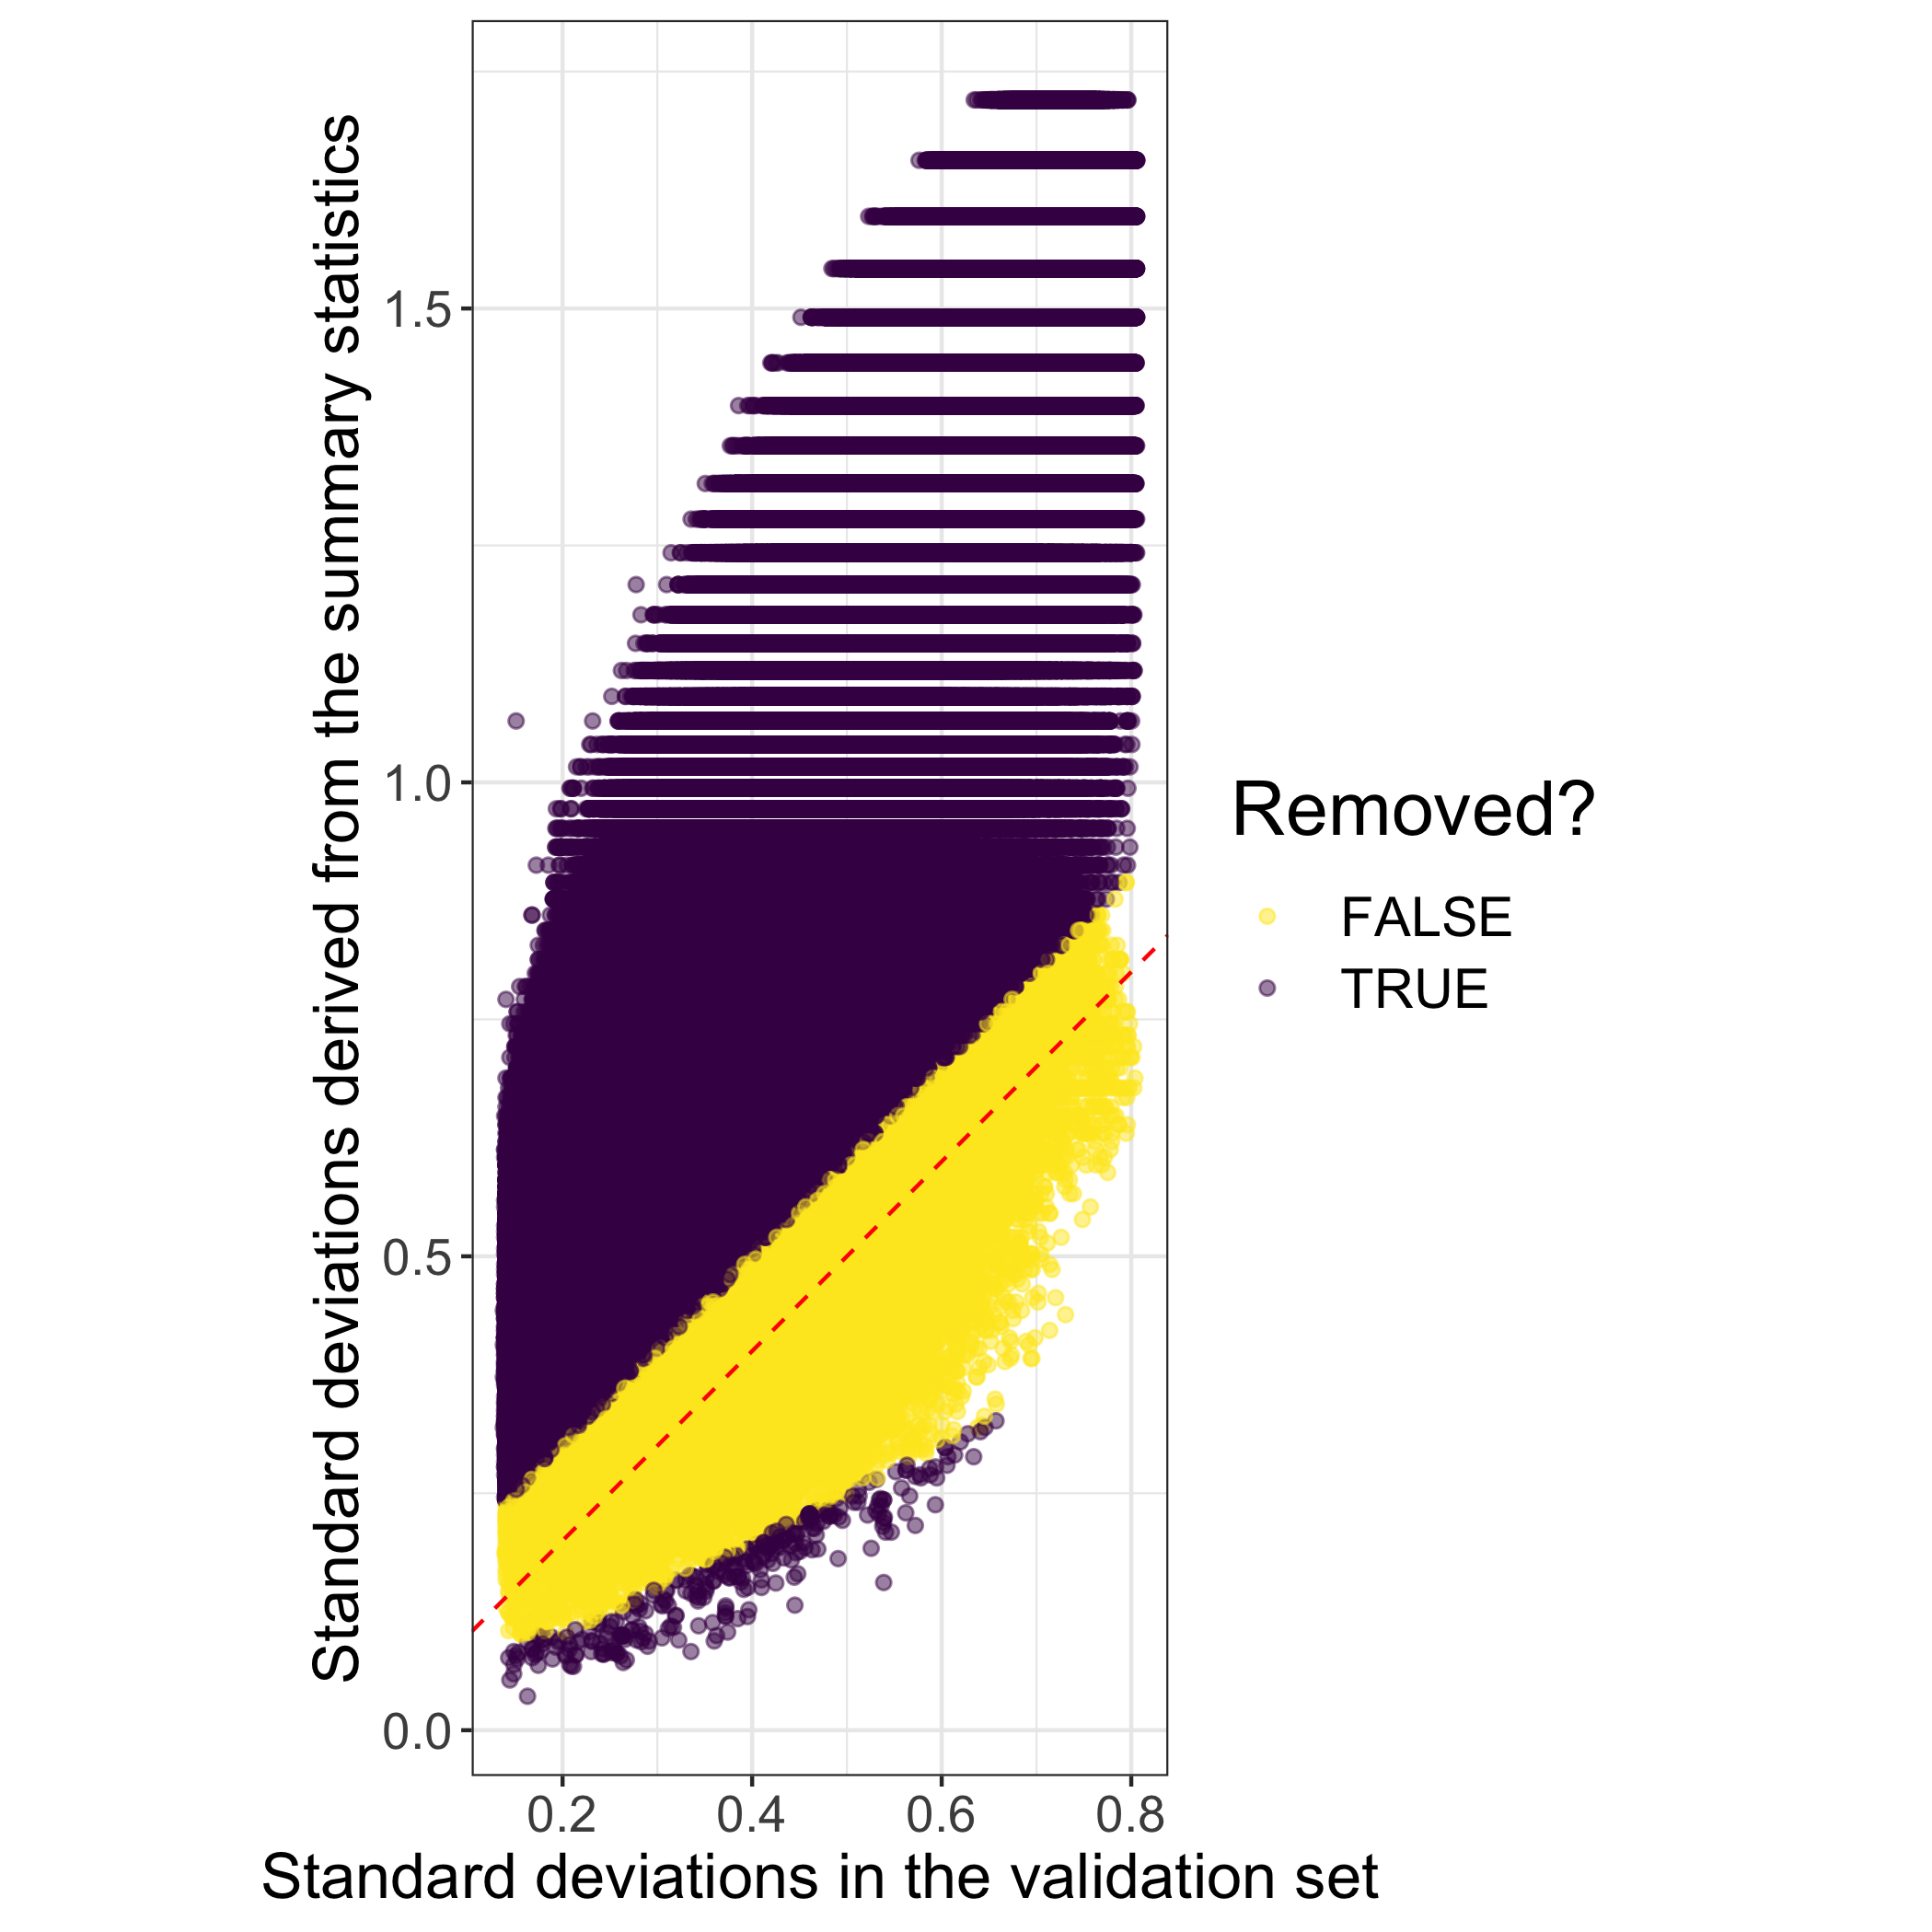

>>> res-data/QcPlot.png:

bash: res-data/QcPlot.png: Permission denied


In [15]:
%preview res-data/QcPlot.png

* Important to check convergence

See the convergence path of p (proportion of causal variants) and $h^2$ heritability.

> res-data/ConvPlot.png (518.4 KiB):

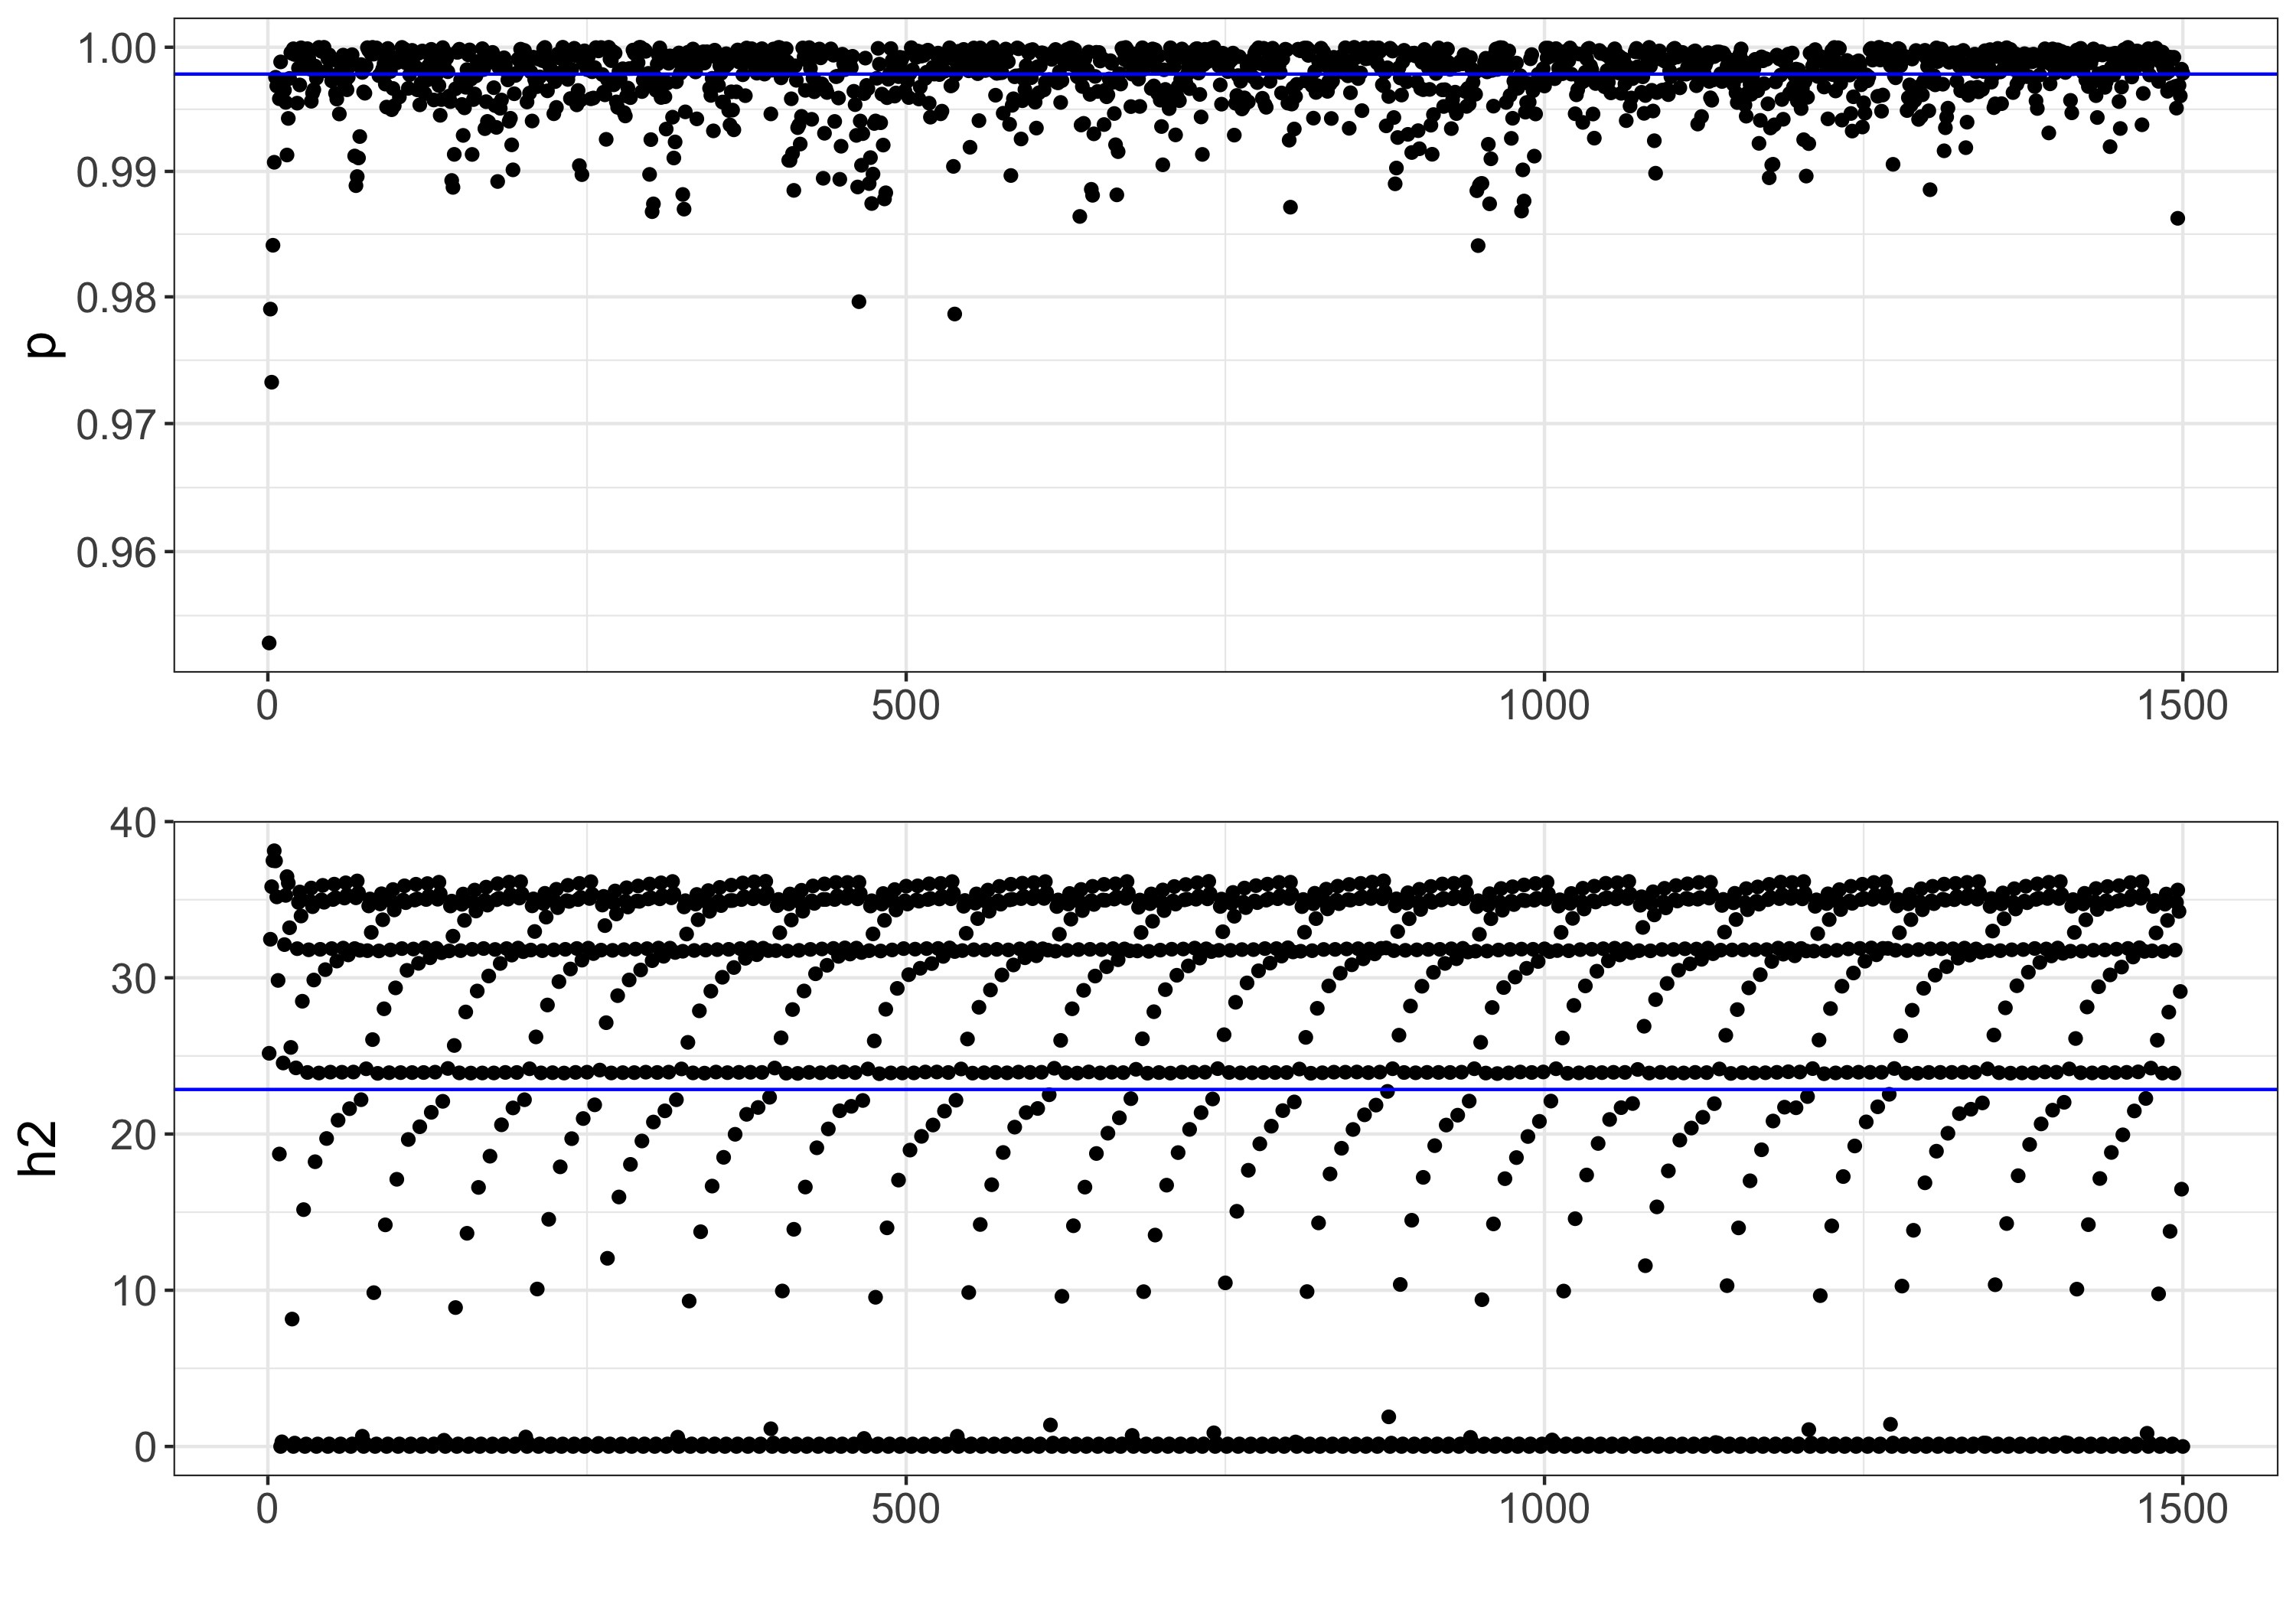

>>> res-data/ConvPlot.png:

bash: res-data/ConvPlot.png: Permission denied


In [16]:
%preview res-data/ConvPlot.png

## tc


In [20]:
sos run ldpred-mvp.ipynb auto \
    --summstats_file mvpdata/sumstats_tc.rds \
    --bed_file  1000G/1000G.bed \
    --geno_file 1000G/1000G.rds \
    --summary_stat './res-data-tc/SumStats.RData' \
    --qc_in './res-data-tc/QcInput.RData' \
    --qc_plot './res-data-tc/QcPlot.png' \
    --conv-plot './res-data-tc/ConvPlot.png' \
    --ld_in './res-data-tc/LdInput.RData' \
    --sd_out './res-data-tc/sd.rds' \
    --ld_out './res-data-tc/LdOutput.RData' \
    --ldreg_out './res-data-tc/LdRegOut.RData' \
    --inf_beta './res-data-tc/InfBeta.RData' \
    --grid_beta './res-data-tc/GridBeta.RData' \
    --auto_beta './res-data-tc/AutoBeta.RData' \
    --inf_prs './res-data-tc/InfPrs.RData' \
    --grid_prs './res-data-tc/GridPrs.RData' \
    --auto_prs './res-data-tc/AutoPrs.RData' \
    --null_r2 './res-data-tc/NullR2.RData' \
    --inf_mod './res-data-tc/InfMod.RData' \
    --grid_mod './res-data-tc/GridMod.RData' \
    --auto_mod './res-data-tc/AutoMod.RData' \
    --inf_pheno_pred './res-data-tc/InfPhenoPred.RData' \
    --grid_pheno_pred './res-data-tc/GridPhenoPred.RData' \
    --auto_pheno_pred './res-data-tc/AutoPhenoPred.RData' \
    --inf_ldpred_res './res-data-tc/InfLdpredRes.RData' \
    --grid_ldpred_res './res-data-tc/GridLdpredRes.RData' \
    --auto_ldpred_res './res-data-tc/AutoLdpredRes.RData' \
    --response 1

INFO: Running auto_20: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
INFO: Running auto_10: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
Loading required package: bigstatsr
Error : File '1000G/1000G.bk' already exists.
INFO: auto_10 is completed.
INFO: auto_20 is completed.
INFO: auto_20 output:   res-data-tc/SumStats.RData
INFO: Running auto_31: 
During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
Loading required package: bigstatsr
9,399,733 variants to be matched.
109,198 ambiguous SNPs have been removed.
1,339,339 variants have been matc

: 1

> res-data-tc/QcPlot.png (450.6 KiB):

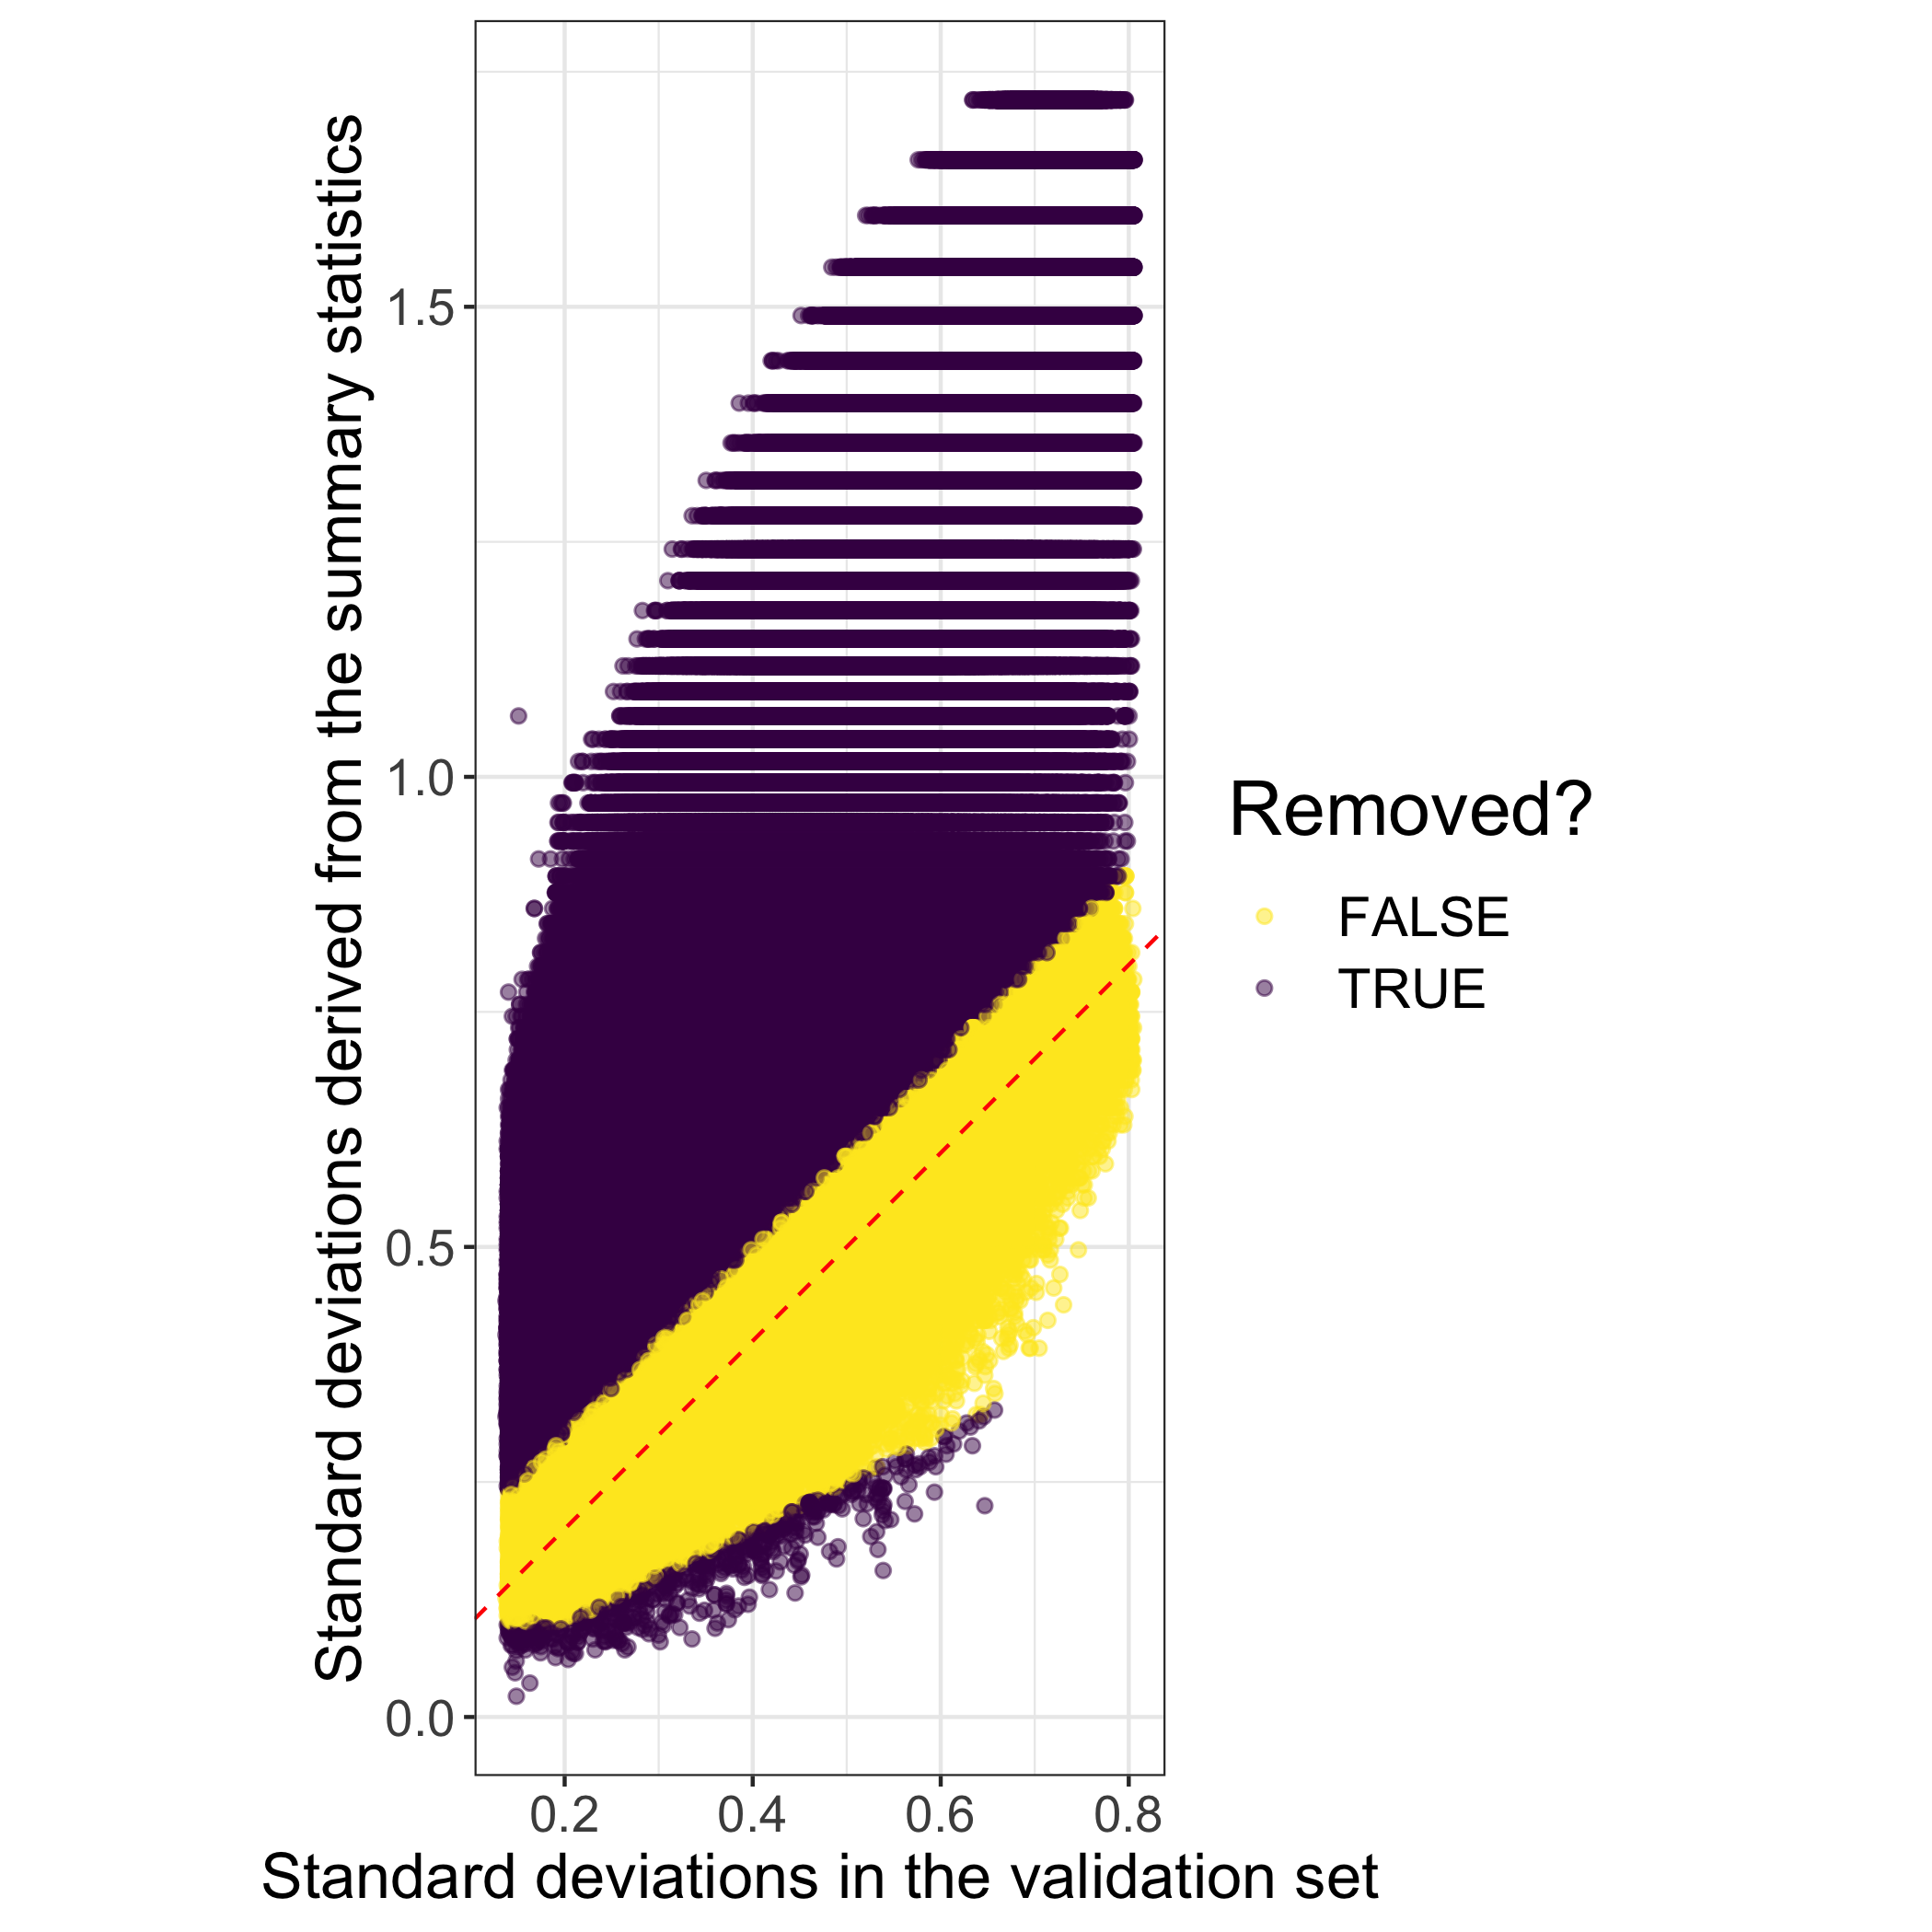

>>> res-data-tc/QcPlot.png:

bash: res-data-tc/QcPlot.png: Permission denied


In [21]:
%preview res-data-tc/QcPlot.png

> res-data-tc/ConvPlot.png (249.3 KiB):

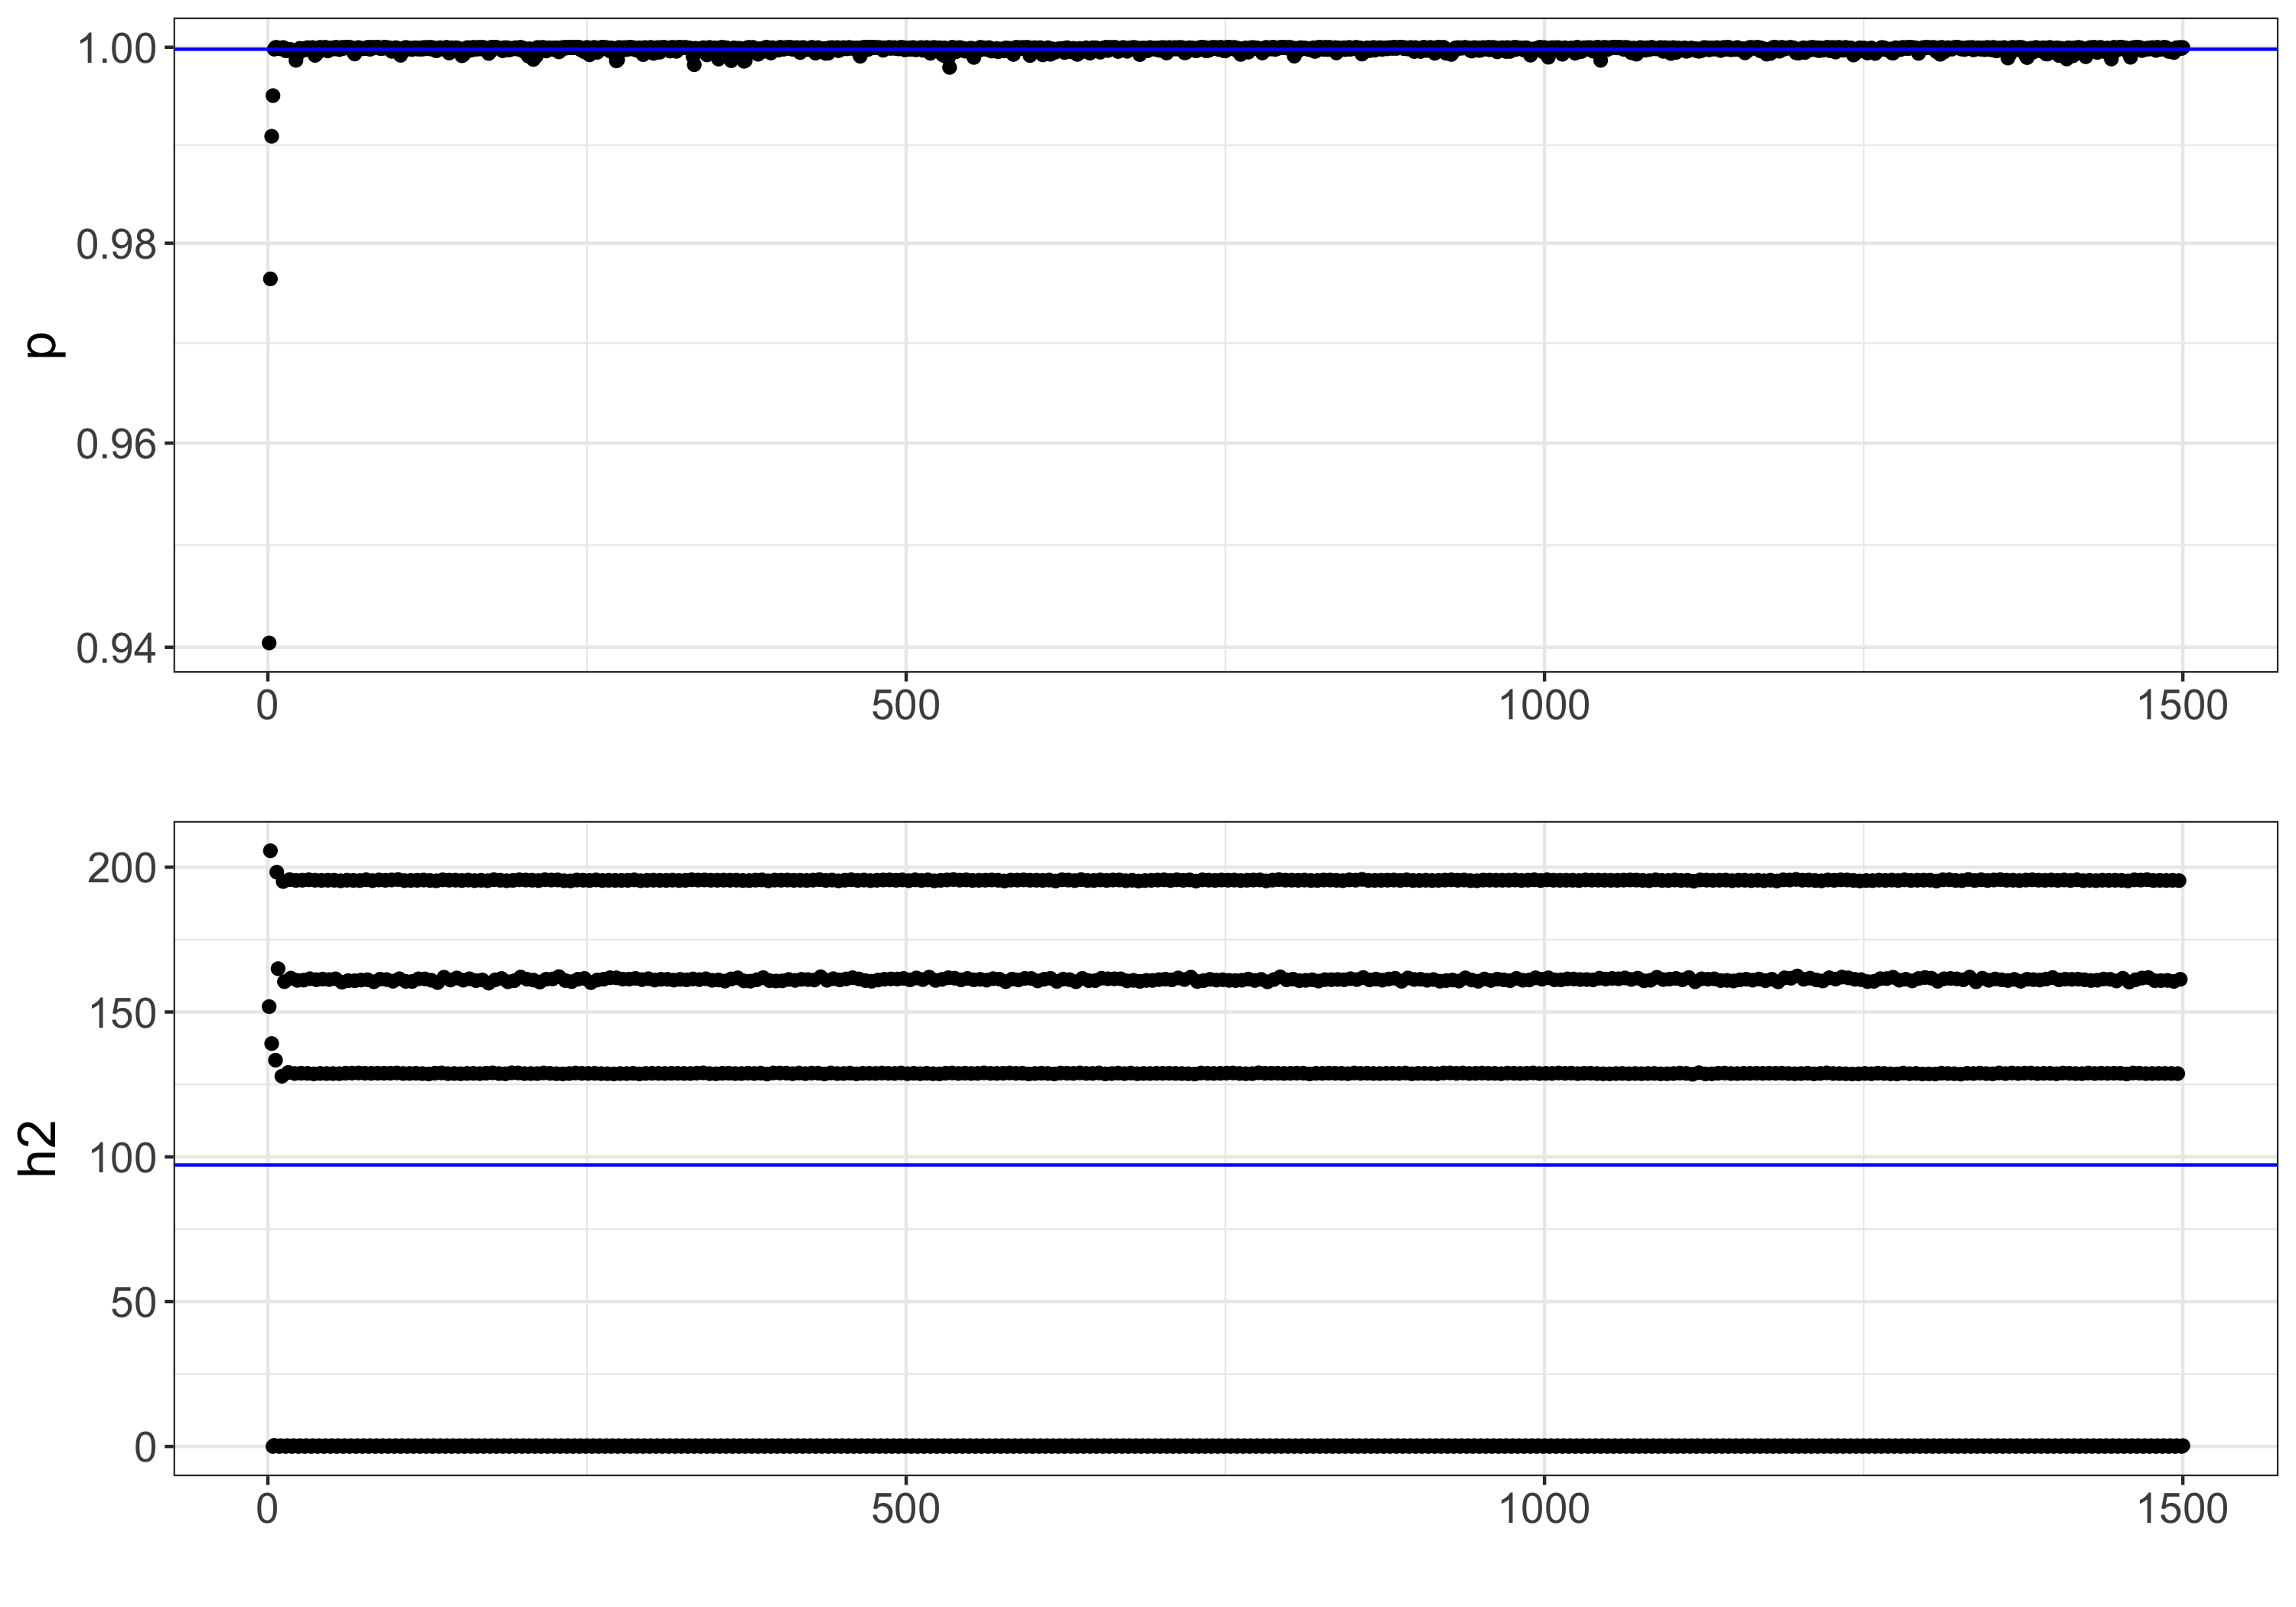

>>> res-data-tc/ConvPlot.png:

bash: res-data-tc/ConvPlot.png: Permission denied


In [22]:
%preview res-data-tc/ConvPlot.png